In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Step 1: Load the dataset
print("Step 1: Loading the dataset...")
url = "/Users/savindajayasekara/WorkZone/ML/test/bank.csv"
df = pd.read_csv(url, sep=';')

Step 1: Loading the dataset...


In [15]:
# Display basic information about the dataset
print("\nDataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())


Dataset shape: (4521, 17)

First 5 rows of the dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
R


Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Distribution of target variable:
y
no     4000
yes     521
Name: count, dtype: int64
y
no     88.476001
yes    11.523999
Name: proportion, dtype: float64


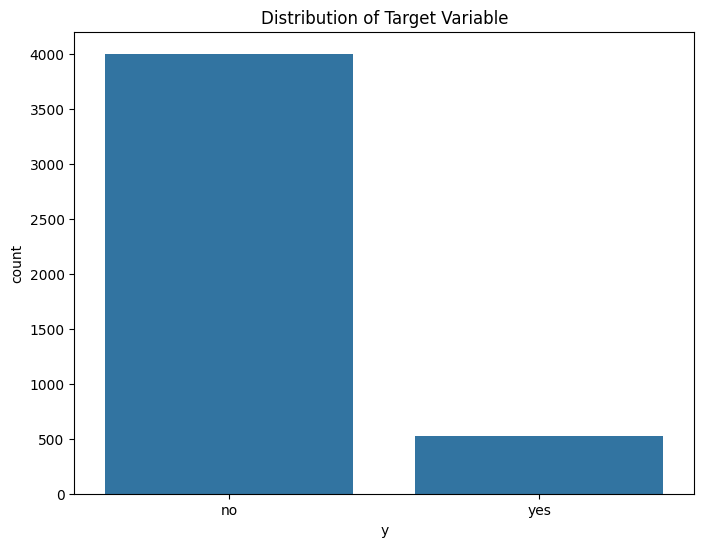

In [16]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check the distribution of the target variable
print("\nDistribution of target variable:")
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True) * 100)

# Visualize the distribution directly in the notebook
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()  # Display the plot in the notebook


Step 2: Preprocessing the dataset...

Checking for 'unknown' values in categorical columns:
job: 38 unknown values
education: 187 unknown values
contact: 1324 unknown values
poutcome: 3705 unknown values

Checking for outliers in numerical columns:


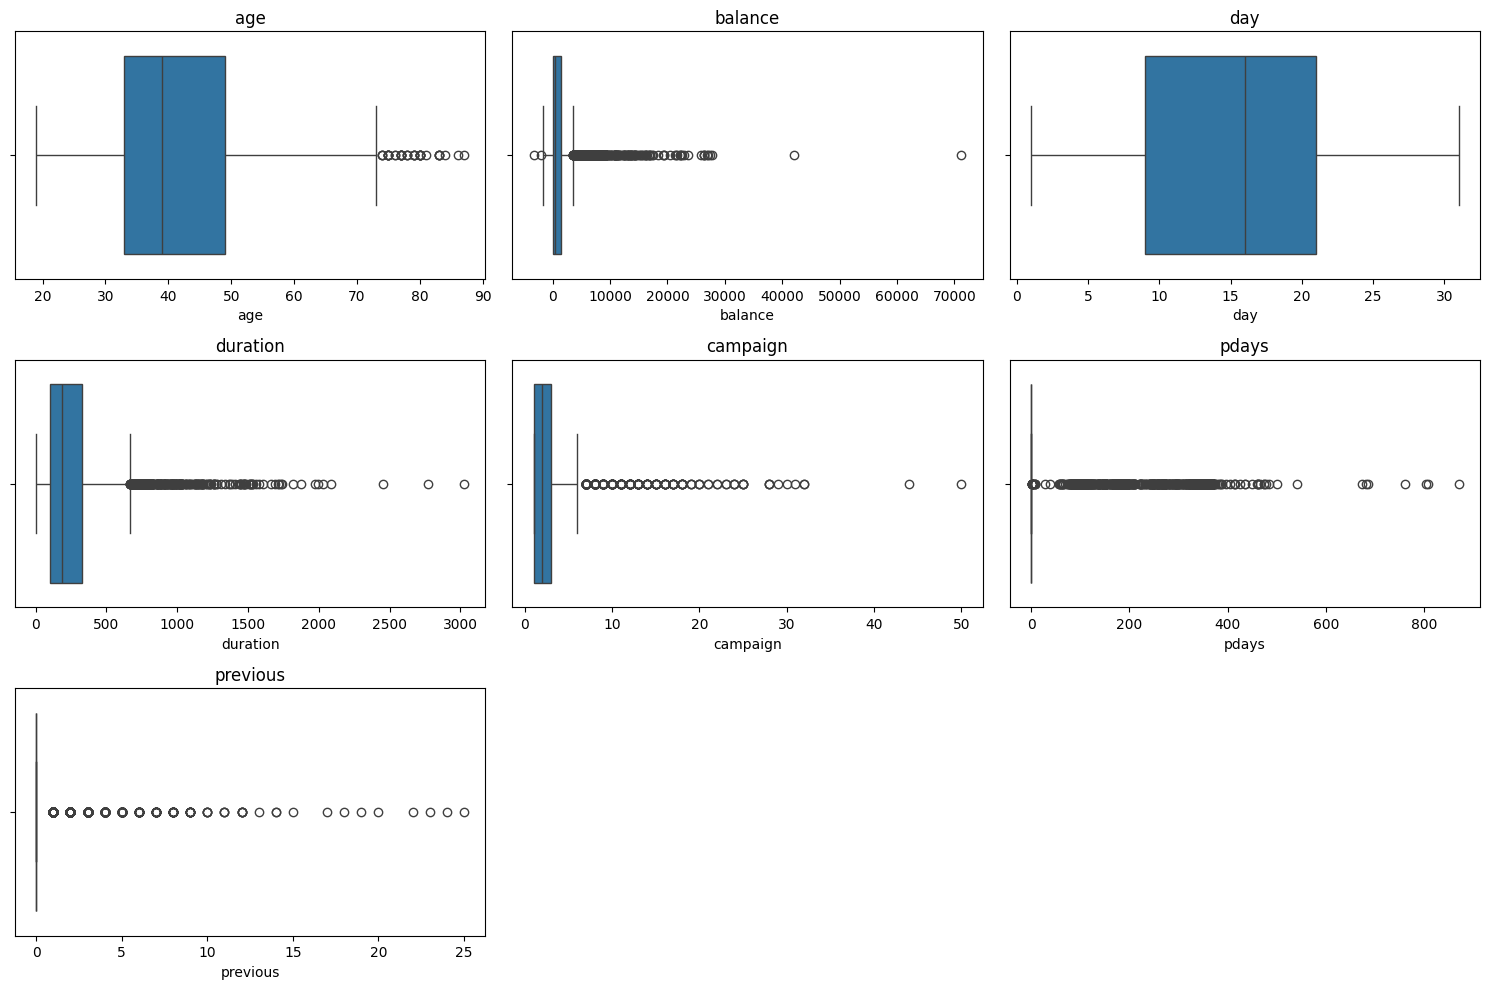


Converting target variable to binary...

Identifying categorical and numerical columns...

Removing 'duration' as it's not suitable for a realistic predictive model...

Splitting data into training and testing sets (80/20)...
Training set shape: (3616, 15)
Testing set shape: (905, 15)

Creating preprocessing pipelines...


In [17]:
# Step 2: Preprocess the dataset
print("\nStep 2: Preprocessing the dataset...")

# A. Handle Missing Values and Outliers
# Check for 'unknown' values in categorical columns
print("\nChecking for 'unknown' values in categorical columns:")
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    if 'unknown' in df[col].unique():
        print(f"{col}: {df[col].value_counts()['unknown']} unknown values")

# Replace 'unknown' with NaN for proper handling
for col in categorical_cols:
    if 'unknown' in df[col].unique():
        df[col] = df[col].replace('unknown', np.nan)

# Check for outliers in numerical columns
print("\nChecking for outliers in numerical columns:")
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create box plots for numerical columns to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()  # Display the plots in the notebook

# B. Feature Coding for Categorical Variables
# Convert target variable to binary (0/1)
print("\nConverting target variable to binary...")
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# C. Scale/Standardize Features
# Identify categorical and numerical columns
print("\nIdentifying categorical and numerical columns...")
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                   'contact', 'month', 'poutcome']
numerical_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# Note: Removing 'duration' as mentioned in the dataset description
print("\nRemoving 'duration' as it's not suitable for a realistic predictive model...")

# Split the data into features and target
X = df.drop(['y', 'duration'], axis=1)
y = df['y']

# Split the data into training and testing sets (80% train, 20% test)
print("\nSplitting data into training and testing sets (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Create preprocessing pipelines for both numerical and categorical data
print("\nCreating preprocessing pipelines...")

# Numerical pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [18]:
# Step 3: Train the models
print("\nStep 3: Training the models...")

# A. Support Vector Machine (SVM)
print("\nTraining SVM model...")
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

svm_pipeline.fit(X_train, y_train)

# Evaluate SVM model
print("\nEvaluating SVM model...")
y_pred_svm = svm_pipeline.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print(f"\nSVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

# B. Logistic Regression
print("\nTraining Logistic Regression model...")
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)

# Evaluate Logistic Regression model
print("\nEvaluating Logistic Regression model...")
y_pred_lr = lr_pipeline.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print(f"\nLogistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

# Step 4: Save the models as pickle files
print("\nStep 4: Saving the models as pickle files...")

# Save the SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_pipeline, file)
print("SVM model saved as 'svm_model.pkl'")

# Save the Logistic Regression model
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_pipeline, file)
print("Logistic Regression model saved as 'lr_model.pkl'")

# Step 5: Demonstrate how to load and use the saved models
print("\nStep 5: Demonstrating how to load and use the saved models...")

# Load the models
with open('svm_model.pkl', 'rb') as file:
    loaded_svm_model = pickle.load(file)

with open('lr_model.pkl', 'rb') as file:
    loaded_lr_model = pickle.load(file)

# Create a sample input
print("\nCreating a sample input...")
sample_input = pd.DataFrame({
    'age': [35],
    'job': ['management'],
    'marital': ['married'],
    'education': ['tertiary'],
    'default': ['no'],
    'balance': [1500],
    'housing': ['yes'],
    'loan': ['no'],
    'contact': ['cellular'],
    'day': [15],
    'month': ['may'],
    'campaign': [1],
    'pdays': [999],
    'previous': [0],
    'poutcome': ['nonexistent']
})

# Make predictions using the loaded models
print("\nMaking predictions using the loaded models...")
svm_prediction = loaded_svm_model.predict(sample_input)
lr_prediction = loaded_lr_model.predict(sample_input)

print(f"SVM Prediction: {'Yes' if svm_prediction[0] == 1 else 'No'}")
print(f"Logistic Regression Prediction: {'Yes' if lr_prediction[0] == 1 else 'No'}")

print("\nDone!")


Step 3: Training the models...

Training SVM model...

Evaluating SVM model...

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       801
           1       0.57      0.12      0.20       104

    accuracy                           0.89       905
   macro avg       0.73      0.56      0.57       905
weighted avg       0.86      0.89      0.86       905


SVM Confusion Matrix:
[[791  10]
 [ 91  13]]

SVM Accuracy: 0.8884

Training Logistic Regression model...

Evaluating Logistic Regression model...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       801
           1       0.57      0.16      0.25       104

    accuracy                           0.89       905
   macro avg       0.73      0.57      0.60       905
weighted avg       0.86      0.89      0.86       905


Logistic Regression Confusion Matrix:
[[788  